## Assignment 3

### Sections
  1. 2 clustering algos x 2 datasets
  2. 3 dim. red. methods x 2 datasets
  3. 2 clustering algos on 6 dim. red. datasets
  4. NN reruns on 3 dim. red. algos. on 1 dataset
  5. Repeat Step 4 but with clusters as features, add them to existing features




###  Methods
2 Clustering methods:
- K-means
- Expectation Maximization

3 Dim. Red. Methods:
- PCA
- ICA
- Randomized Projections

_________


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix as sm

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV,validation_curve,learning_curve

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection



In [15]:
telco_df = pd.read_csv("../A1/data/telco/Telco-Customer-Churn.csv")
wine_df = pd.read_csv("../A1/data/wine_quality/winequality-red.csv",delimiter=';')
gtid = 903971235
seed = gtid

## 1. Clustering with 2 Datasets

### 1.1 Wine Dataset : Clustering 

In [4]:
wine_df.describe()



fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

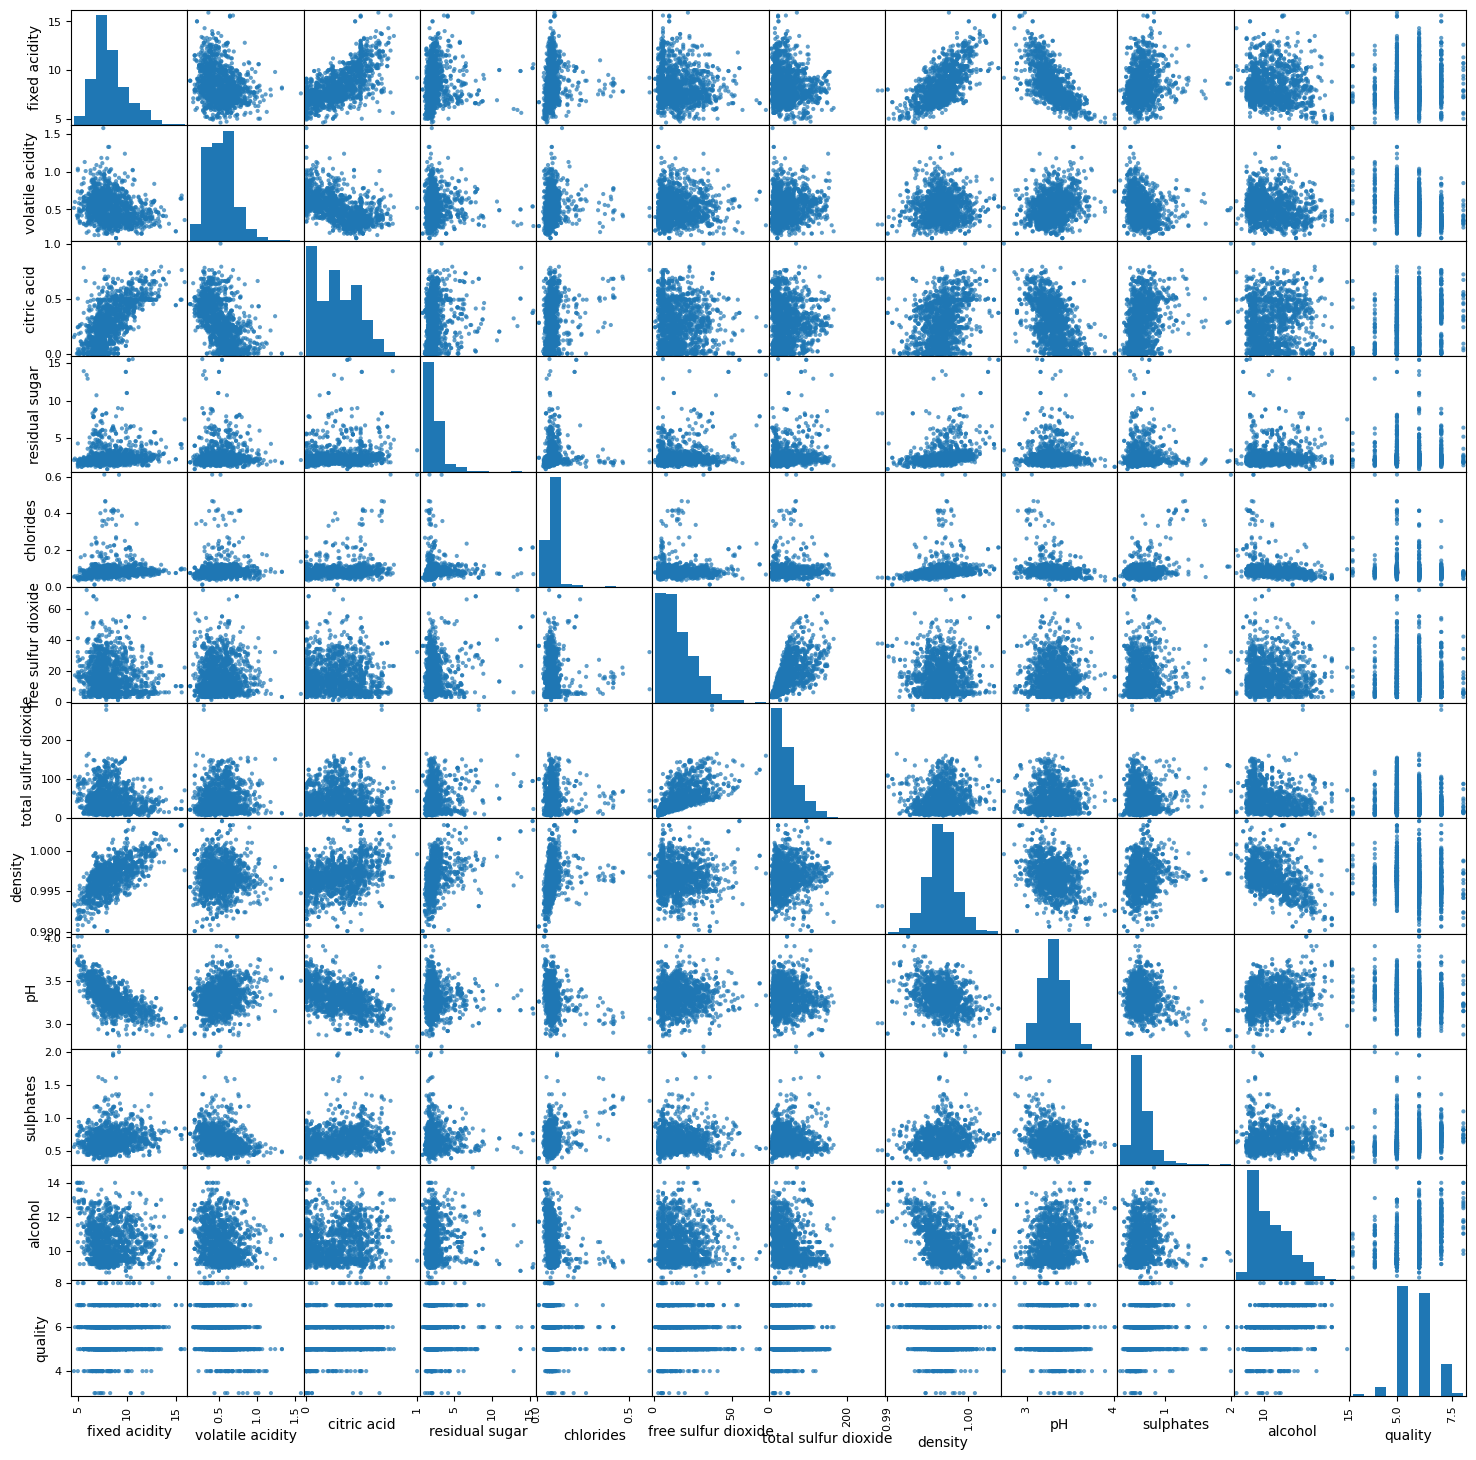

In [5]:
# Scatter plot
sm(wine_df, alpha = 0.7, figsize = (18,18))
plt.show()

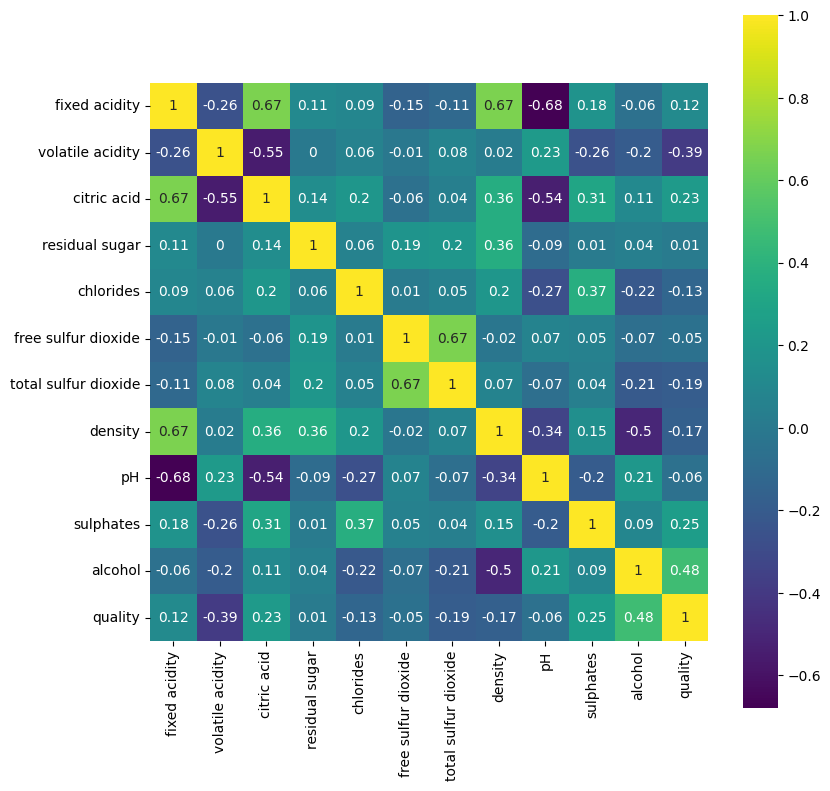

In [6]:
# Correlation Heatmap
correlation = wine_df.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'viridis')
plt.show()



In [7]:
wine_df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [25]:


X_wine_df = wine_df.drop(['quality'], axis = 1)
y_wine_df = wine_df['quality'] #For Test & Evaluation

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine_df)
X_scaled_df = pd.DataFrame(X_scaled,columns=X_wine_df.columns)


### 1.1.1 Wine Data: KMeans Clustering

In [16]:

elbow = dict()

for k in range(1,20):
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(X_scaled)
    inertia = estimator.inertia_
    elbow[k] = inertia
    
elbow_df = pd.Series(elbow)
elbow_df

1     17589.000000
2     14331.622531
3     12629.974592
4     11471.665260
5     10155.920552
6      9434.068356
7      8649.969243
8      8380.586284
9      8037.166713
10     7695.938486
11     7476.891239
12     7259.929139
13     7013.127882
14     6873.564388
15     6752.567790
16     6609.076720
17     6485.777553
18     6360.320861
19     6305.619756
dtype: float64

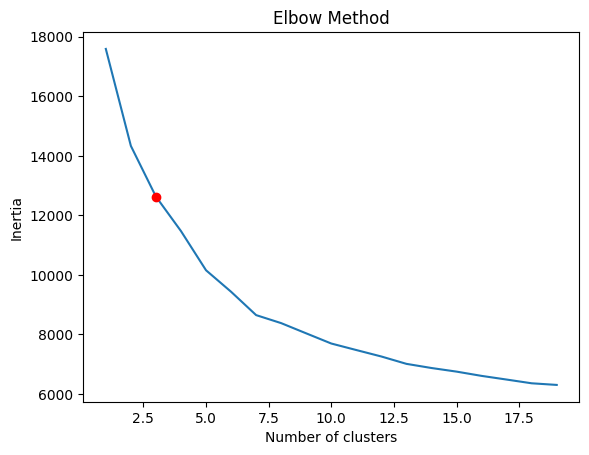

In [17]:
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(3,elbow_df[3],'ro')


In [68]:
optimal_clusters = 3
KM = KMeans(n_clusters = 3, random_state=seed, max_iter=1000, tol=0.0001, algorithm="elkan")
res = KM.fit_predict(X_scaled)
label_pred_KM = KM.labels_
inertia_KM = KM.inertia_

In [31]:
pd.Series(label_pred_KM).value_counts()

2    722
1    502
0    375
Name: count, dtype: int64

In [34]:
X_scaled_df_copy = X_scaled_df.copy()

In [36]:
X_scaled_df_copy['cluster'] = label_pred_KM.astype(str) # type: ignore


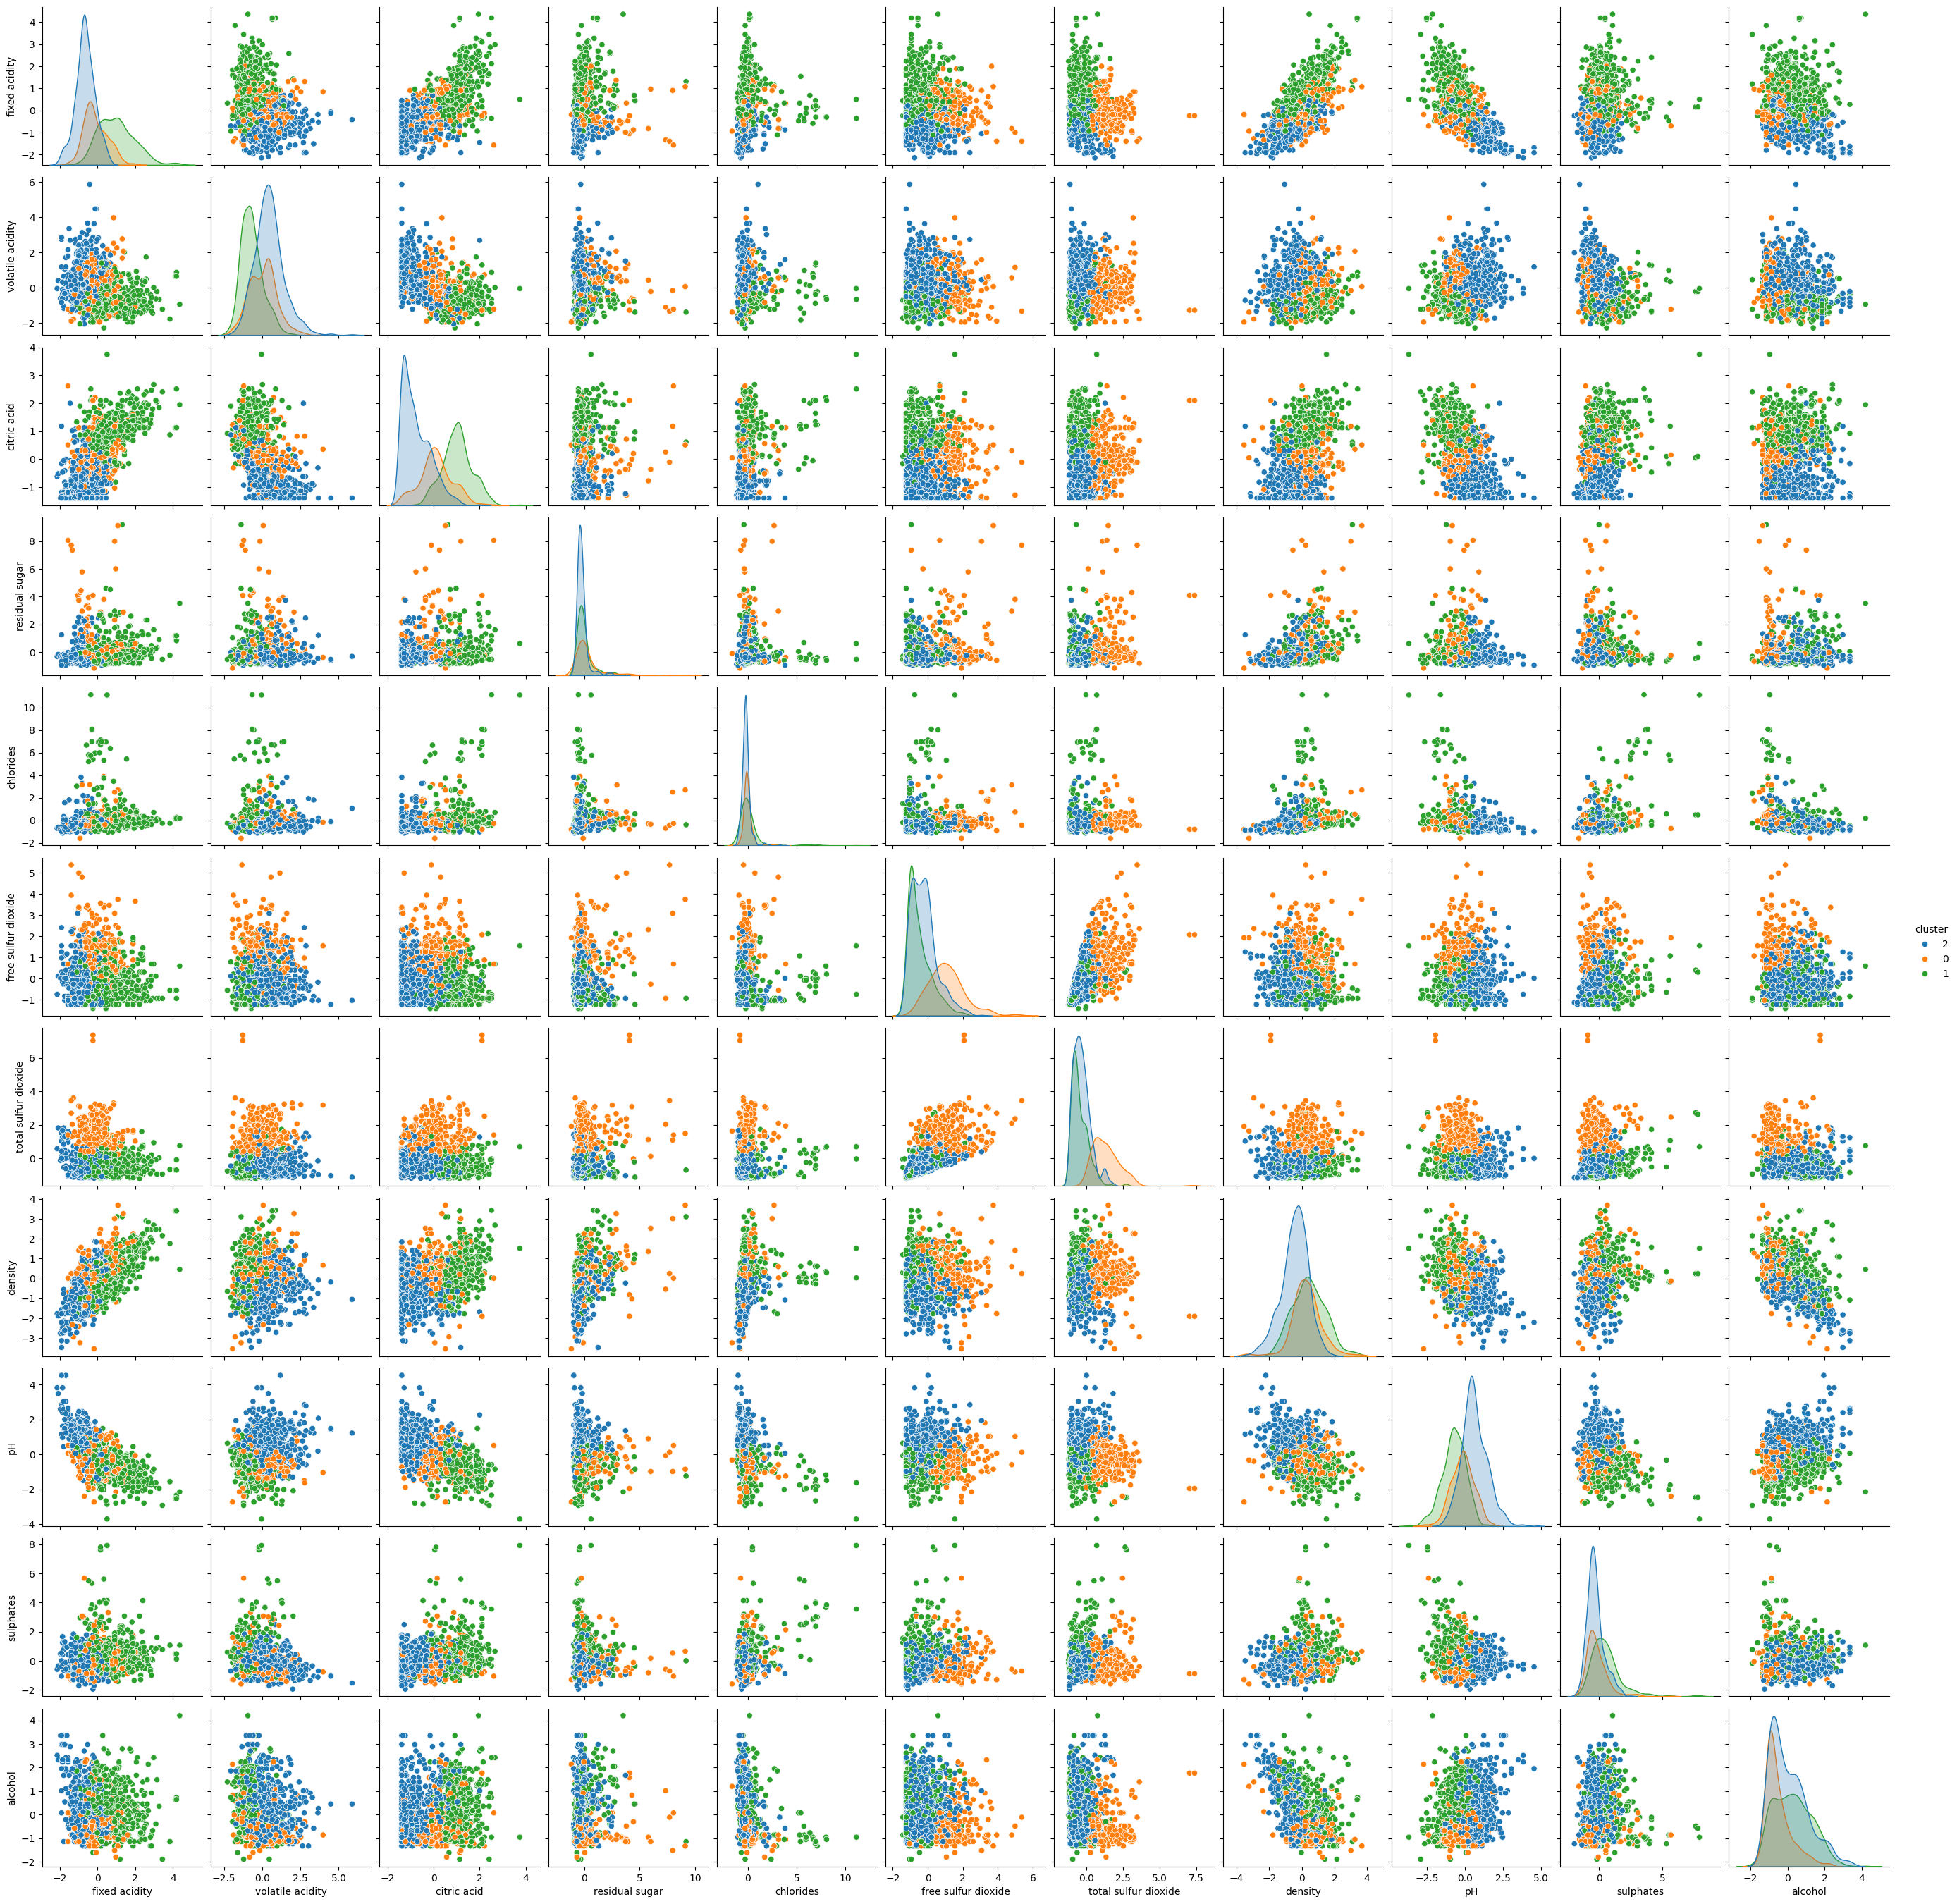

In [37]:

sns_plot = sns.pairplot(X_scaled_df_copy, hue = "cluster")

In [33]:

silhouette_avg = silhouette_score(X_scaled_df, label_pred_KM)
print("For n_clusters =", optimal_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.18920406811092624


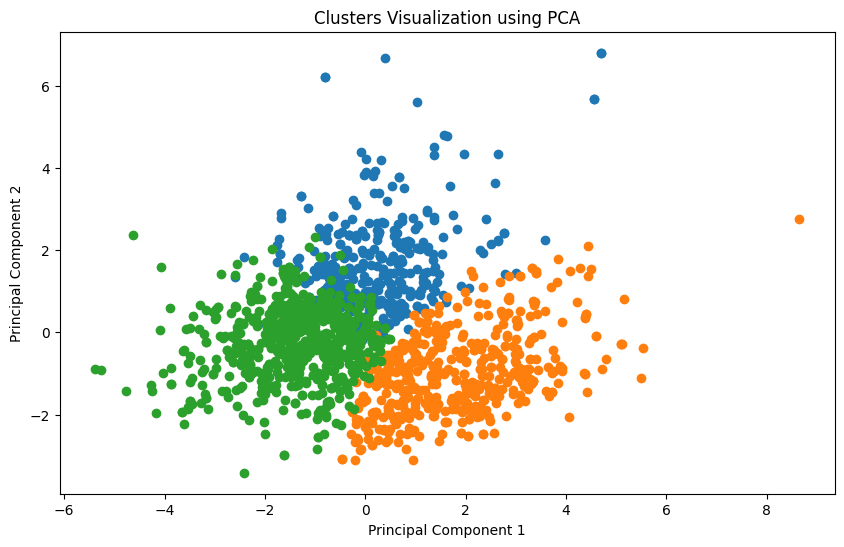

In [41]:


pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = label_pred_KM
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
    
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

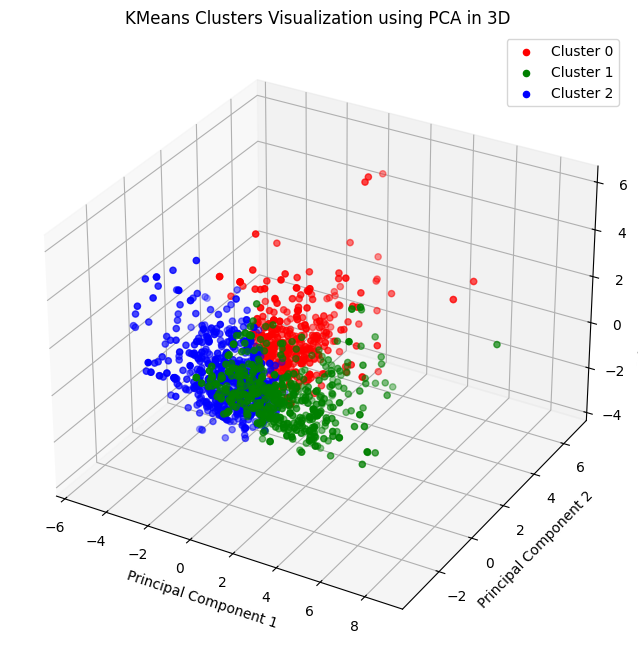

In [69]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = label_pred_KM

# Plot the PCA results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b'] 

for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               label=f'Cluster {cluster}', color=colors[cluster])

ax.set_title('KMeans Clusters Visualization using PCA in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

### 1.1.2 Wine Data: Guassian Mixture Model (Expectation Maximization)

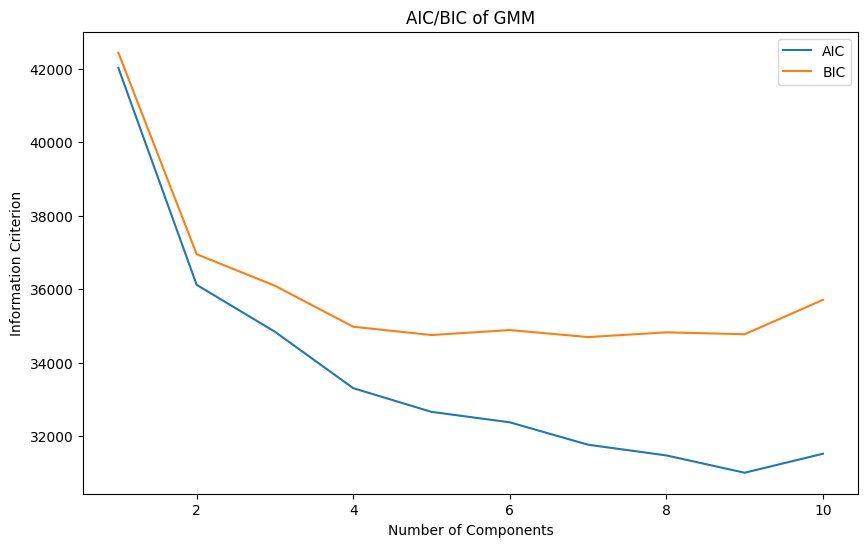

In [18]:
aic = dict()
bic = dict()

# Fit Gaussian Mixture Models from 1 to 10 components
for k in range(1, 11):
    estimator = GaussianMixture(n_components=k, random_state=seed)
    estimator.fit(X_scaled_df)
    ic1 = estimator.aic(X_scaled_df)
    ic2 = estimator.bic(X_scaled_df)
    aic[k] = ic1
    bic[k] = ic2

# Convert AIC and BIC to Series
aic_df = pd.Series(aic)
bic_df = pd.Series(bic)

# Create a DataFrame for AIC and BIC
temp = {'AIC': aic_df, 'BIC': bic_df}
ic_df = pd.DataFrame(temp)

# Plot AIC and BIC
ax = ic_df.plot(title='AIC/BIC of GMM', figsize=(10, 6))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Information Criterion')
plt.legend(["AIC", "BIC"])
plt.show()

Based on my plot, 3 clusters seem to be a good choice.

In [19]:
optimal_clusters = 3

GMM = GaussianMixture(n_components=optimal_clusters, random_state=seed)
res_GMM = GMM.fit(X_scaled_df)
labels_GMM = GMM.predict(X_scaled_df)

np.set_printoptions(formatter={'float_kind':'{:.3f}'.format})
cluster_counts = pd.Series(labels_GMM).value_counts()

print(cluster_counts)

2    1075
0     348
1     176
Name: count, dtype: int64


In [20]:

silhouette_avg = silhouette_score(X_scaled_df, labels_GMM)
print("For n_clusters =", optimal_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.12022967421339148


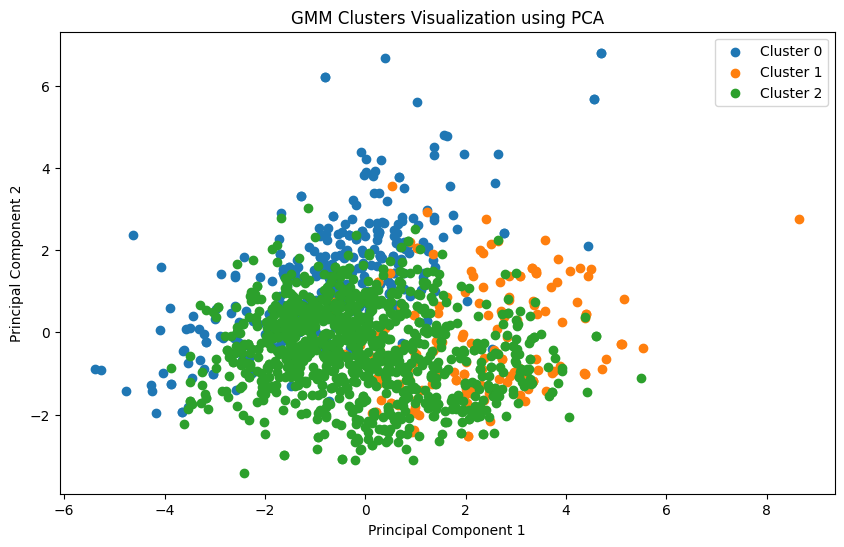

In [21]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels_GMM

# Plot the PCA results
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('GMM Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [63]:
from mpl_toolkits.mplot3d import Axes3D

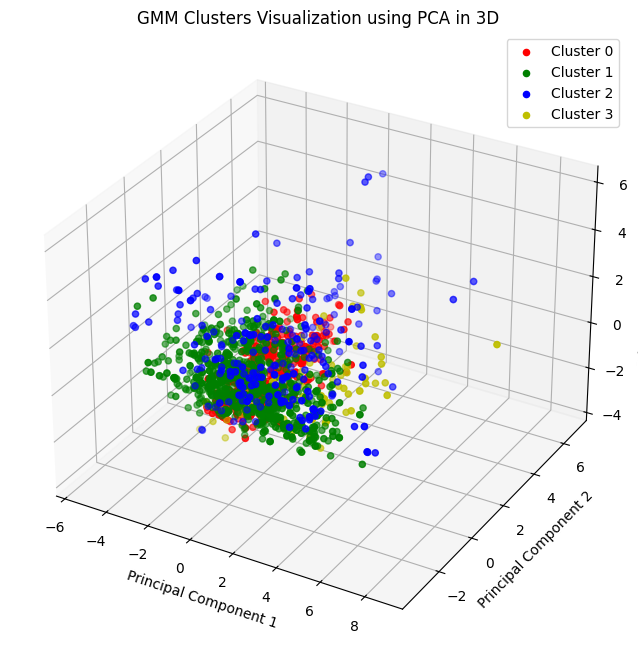

In [64]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = labels_GMM

# Plot the PCA results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y'] 

for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               label=f'Cluster {cluster}', color=colors[cluster])

ax.set_title('GMM Clusters Visualization using PCA in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

### 1.2.1 TELCO Dataset: Kmeans Clustering

In [26]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df.dropna(subset=['TotalCharges'], how='all', inplace=True)
telco_df = telco_df.drop(columns=['customerID'], axis=1)


telco_df['Churn'] = telco_df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

# Identify categorical and binary columns (subset of categorical columns with only two unique values)
categorical_columns = telco_df.select_dtypes(include=['object', 'category']).columns.tolist()
binary_columns = [col for col in categorical_columns if telco_df[col].nunique() == 2]

label_encoder = LabelEncoder()
for col in binary_columns:
    telco_df[col] = label_encoder.fit_transform(telco_df[col])

categorical_columns = [col for col in categorical_columns if col not in binary_columns]
telco_df = pd.get_dummies(telco_df, columns=categorical_columns).astype(int)




telco_df['MonthlyCharges']=np.log1p(telco_df['MonthlyCharges'])
telco_df['TotalCharges']=np.log1p(telco_df['TotalCharges'])


In [27]:
telco_df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                    1        3.401197      3.401197      0  ...   
1                    0        4.043051      7.544332      0  ...   
2                    1        3.988984      4.691348      1  ...   
3                    0        3.761200      7.518064      0  ...   
4                    1        4.262680      5.023881      1  ...   
...                ...             ...           ...    ...  ...   
7038                 1        4.442651      7.596392      0  ...   
7039                 1        4.644391      8.904223      0  ...   
7040                 1        3.401197      5.849325      0  ...   
7041                 1        4.317488      5.726848      1  ...   
7042                 1        4.663439      8.831274      0  ...   

      StreamingMovies_No  StreamingMovies_No internet service  \
0                      1                                    0   
1                      1                                    0   
2                      1                                    0   
3                      1                                    0   
4                      1                                    0   
...                  ...                                  ...   
7038                   0                                    0   
7039                   0                                    0   
7040                   1                                    0   
7041                   1                                    0   
7042                   0                                    0   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                       0                        1                  0   
1                       0                        0                  1   
2                       0                        1                  0   
3                       0                        0                  1   
4                       0                        1                  0   
...                   ...                      ...                ...   
7038                    1                        0                  1   
7039                    1                        0                  1   
7040                    0                        1                  0   
7041                    0                        1                  0   
7042                    1                        0                  0   

      Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                     0                                        0   
1                     0                                        0   
2                     0                                        0   
3                     0                                        1   
4                     0                                        0   
...                 ...                                      ...   
7038                  0                                        0   
7039                  0                                        0   
7040                  0       

In [72]:
seed = gtid
elbow = dict()

for k in range(1,20):
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(telco_df)
    inertia = estimator.inertia_
    elbow[k] = inertia
    
elbow_df = pd.Series(elbow)
elbow_df

1     4.309769e+06
2     9.113481e+05
3     4.162372e+05
4     2.497643e+05
5     1.790464e+05
6     1.388931e+05
7     1.359256e+05
8     1.024622e+05
9     9.049888e+04
10    8.495594e+04
11    8.004052e+04
12    7.520683e+04
13    7.325381e+04
14    6.944809e+04
15    6.779830e+04
16    6.729428e+04
17    6.548492e+04
18    6.315918e+04
19    6.169844e+04
dtype: float64

Text(0, 0.5, 'Inertia')

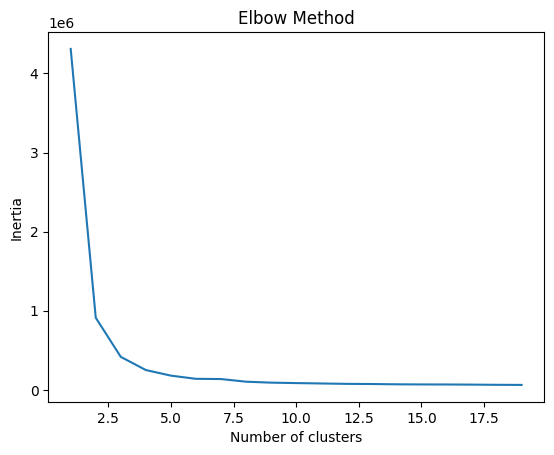

In [73]:
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')


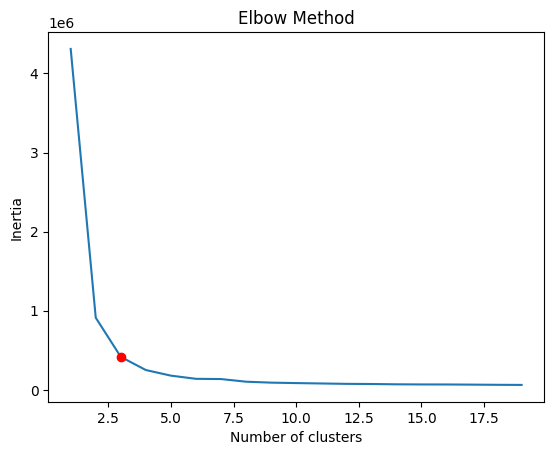

In [143]:
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(3,elbow_df[3],'ro')


In [74]:
optimal_clusters = 3
KM = KMeans(n_clusters = optimal_clusters, random_state=seed, max_iter=1000, algorithm="elkan")
res = KM.fit_predict(telco_df)
label_pred_KM = KM.labels_
inertia_KM = KM.inertia_

In [75]:
pd.Series(label_pred_KM).value_counts()


0    2867
1    2239
2    1926
Name: count, dtype: int64

In [ ]:

# telco_df['cluster'] = label_pred_KM.astype(str)
# sns_plot = sns.pairplot(telco_df, hue = "cluster")

In [76]:

silhouette_avg = silhouette_score(telco_df, label_pred_KM)
print("For n_clusters =", optimal_clusters, "The average silhouette_score is :", silhouette_avg)



For n_clusters = 3 The average silhouette_score is : 0.59153854226487


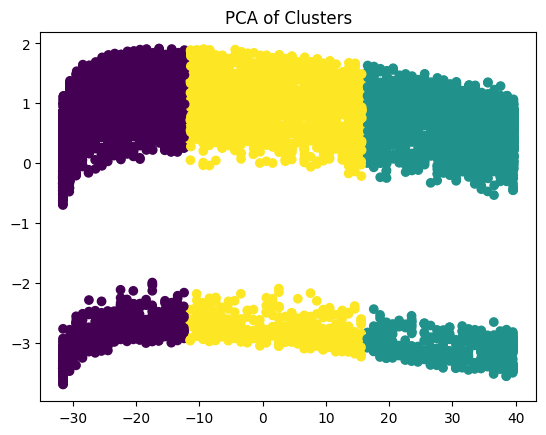

In [110]:
pca = PCA(2)
reduced_data = pca.fit_transform(telco_df)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=label_pred_KM, cmap='viridis')
plt.title('PCA of Clusters')
plt.show()

### 1.2.2 Telco Data: Guassian Mixture Model (Expectation Maximization)

/Users/nasharma/Code/.venv/lib/python3.9/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


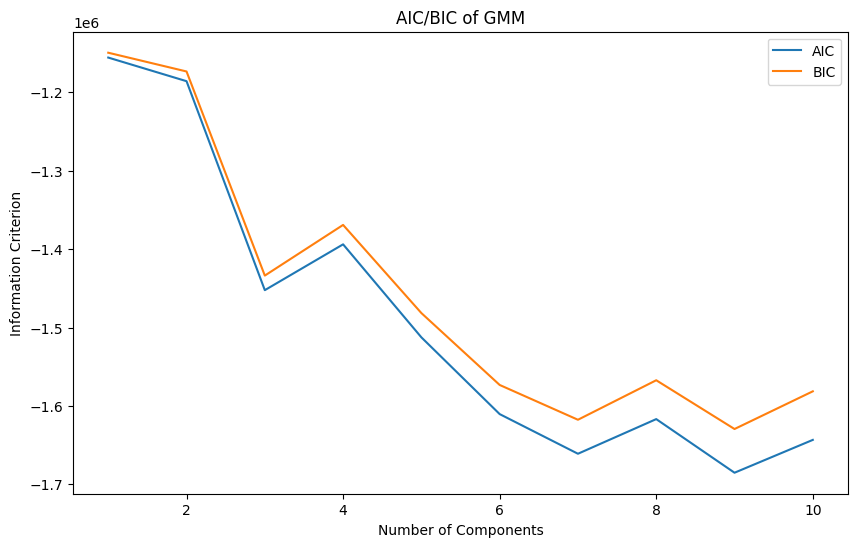

In [78]:
aic = dict()
bic = dict()

# Fit Gaussian Mixture Models from 1 to 10 components
for k in range(1, 11):
    estimator = GaussianMixture(n_components=k, random_state=seed)
    estimator.fit(telco_df)
    ic1 = estimator.aic(telco_df)
    ic2 = estimator.bic(telco_df)
    aic[k] = ic1
    bic[k] = ic2

# Convert AIC and BIC to Series
aic_df = pd.Series(aic)
bic_df = pd.Series(bic)

# Create a DataFrame for AIC and BIC
temp = {'AIC': aic_df, 'BIC': bic_df}
ic_df = pd.DataFrame(temp)

# Plot AIC and BIC
ax = ic_df.plot(title='AIC/BIC of GMM', figsize=(10, 6))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Information Criterion')
plt.legend(["AIC", "BIC"])
plt.show()

In [79]:
optimal_clusters = 6

GMM = GaussianMixture(n_components=optimal_clusters, random_state=seed, max_iter=1000,n_init=5)
res_GMM = GMM.fit(telco_df)
labels_GMM = GMM.predict(telco_df)

np.set_printoptions(formatter={'float_kind':'{:.3f}'.format})
cluster_counts = pd.Series(labels_GMM).value_counts()

print(cluster_counts)

0    2288
2    1857
4    1535
3     976
1     252
5     124
Name: count, dtype: int64


In [80]:

silhouette_avg = silhouette_score(telco_df, labels_GMM)
print("For n_clusters =", optimal_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 6 The average silhouette_score is : -0.05548401227698332


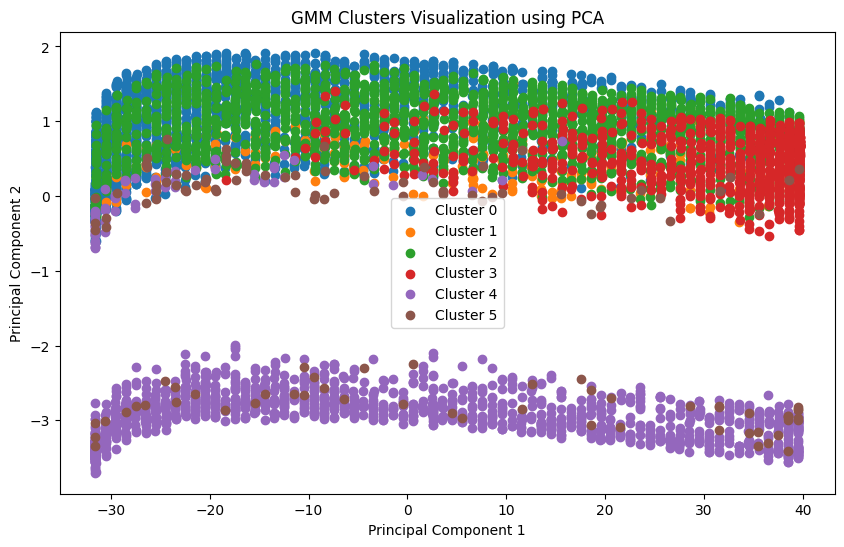

In [85]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(telco_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels_GMM

# Plot the PCA results
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('GMM Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## 2. Dimensionality Reduction (3 Algos) with 2 Datasets

### 2.1.1 PCA: Wine Dataset

In [88]:
### Wine Dataset

pca = PCA()
pca.fit(X_scaled)

PCA()

In [89]:
# Calculate the explained variance &  Cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [90]:
cumulative_explained_variance

array([0.282, 0.457, 0.598, 0.708, 0.795, 0.855, 0.908, 0.947, 0.978,
       0.995, 1.000])

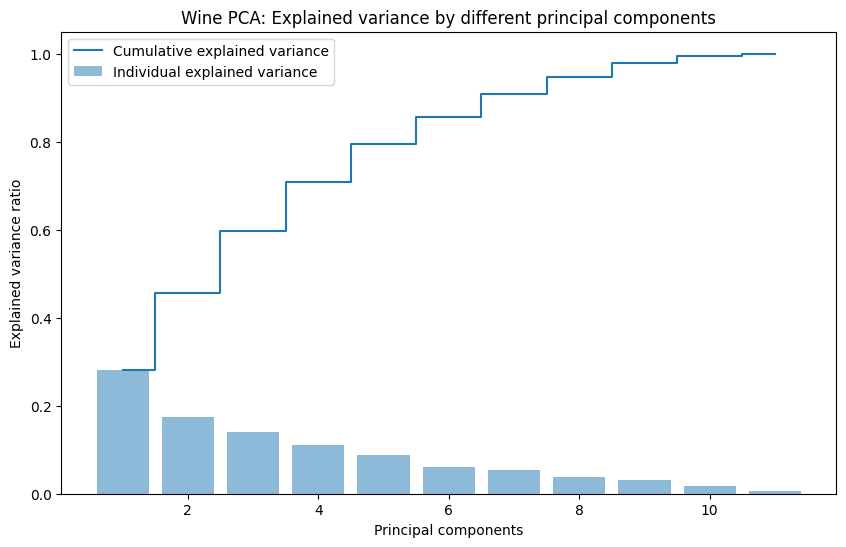

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Wine PCA: Explained variance by different principal components')
plt.legend(loc='best')
plt.show()


In [92]:
num_components = np.argmax(cumulative_explained_variance >= 0.85) + 1
print(f"Number of components explaining at least 90% variance: {num_components}")


Number of components explaining at least 90% variance: 6


### 2.1.2 PCA: Telco Dataset

In [106]:
pca = PCA()
pca.fit(telco_df)

PCA()

In [107]:
# Calculate the explained variance &  Cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [108]:
cumulative_explained_variance

array([0.987, 0.991, 0.992, 0.993, 0.994, 0.994, 0.995, 0.995, 0.996,
       0.996, 0.997, 0.997, 0.997, 0.998, 0.998, 0.998, 0.999, 0.999,
       0.999, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000,
       1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000,
       1.000, 1.000, 1.000, 1.000, 1.000])

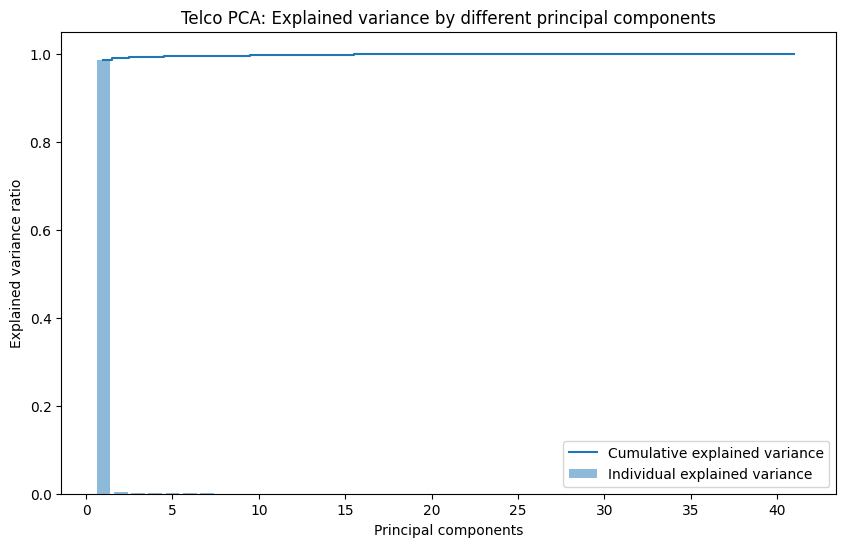

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Telco PCA: Explained variance by different principal components')
plt.legend(loc='best')
plt.show()


#### Helper Functions

#### Doing things a bit more programmatically now

In [117]:
# Function to plot cumulative explained variance for PCA
def plot_cumulative_variance(pca, title):
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [121]:
# Function to evaluate reconstruction error
def reconstruction_error(X, n_components):
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_projected = rp.fit_transform(X)
    X_reconstructed = rp.inverse_transform(X_projected)
    return mean_squared_error(X, X_reconstructed)

# Function to plot kurtosis for ICA
def plot_kurtosis(ica, title):
    kurtosis = pd.DataFrame(ica.components_).kurt(axis=1)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(kurtosis)), kurtosis)
    plt.xlabel('Independent Component')
    plt.ylabel('Kurtosis')
    plt.title(title)
    plt.grid(True)
    plt.show()

### 2. PCA, RP & ICA for Wine and Telco Dataset

In [114]:
datasets = [
    ("Wine", X_scaled),
    ("Telco", telco_df)
]


--- Wine Dataset ---



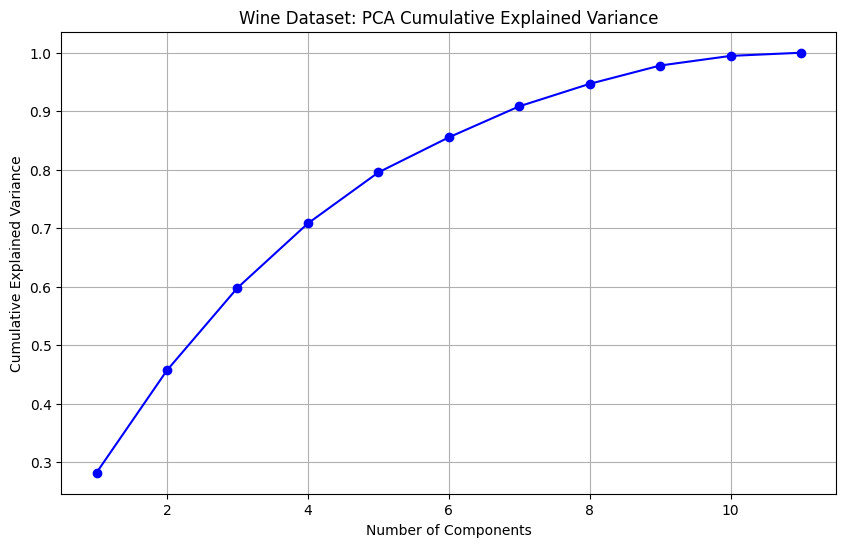

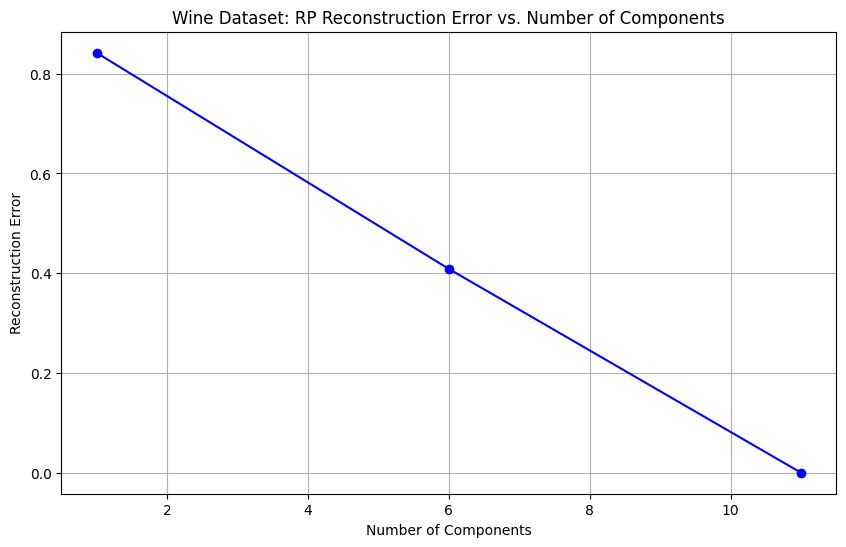

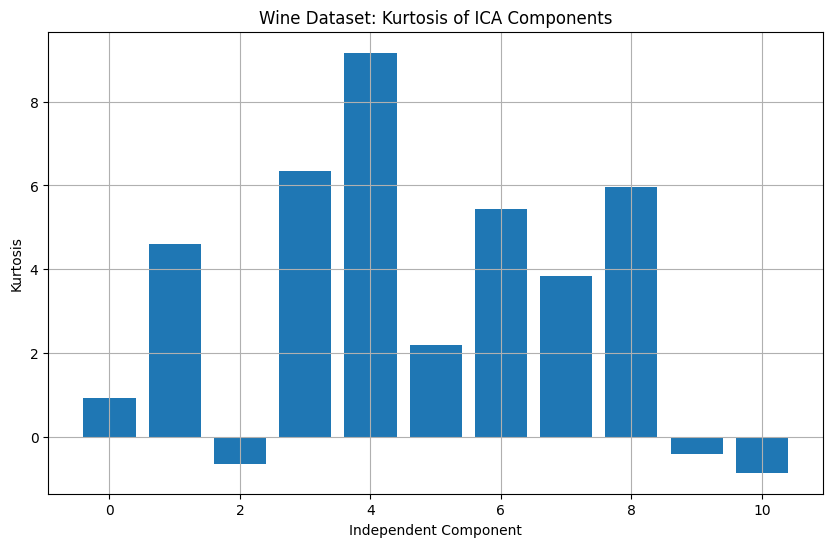

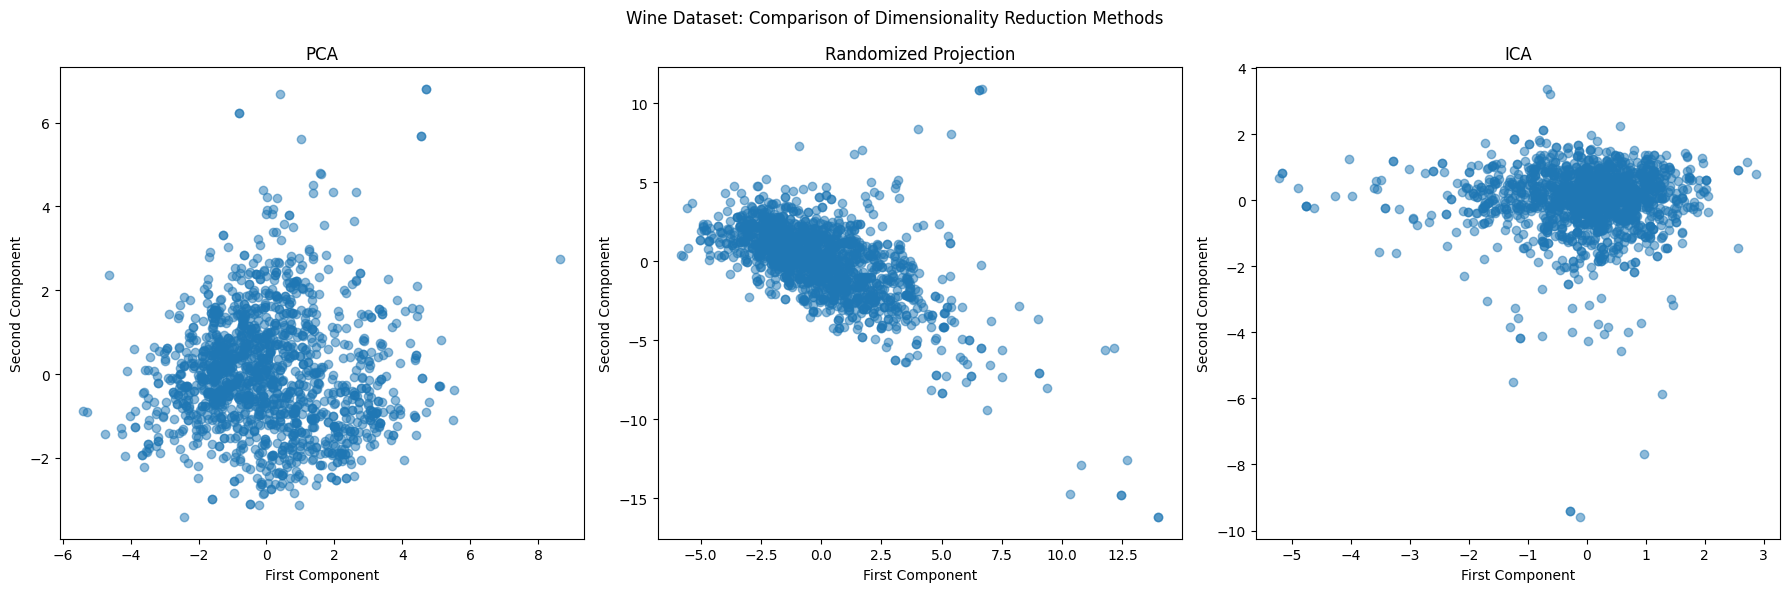




--- Telco Dataset ---



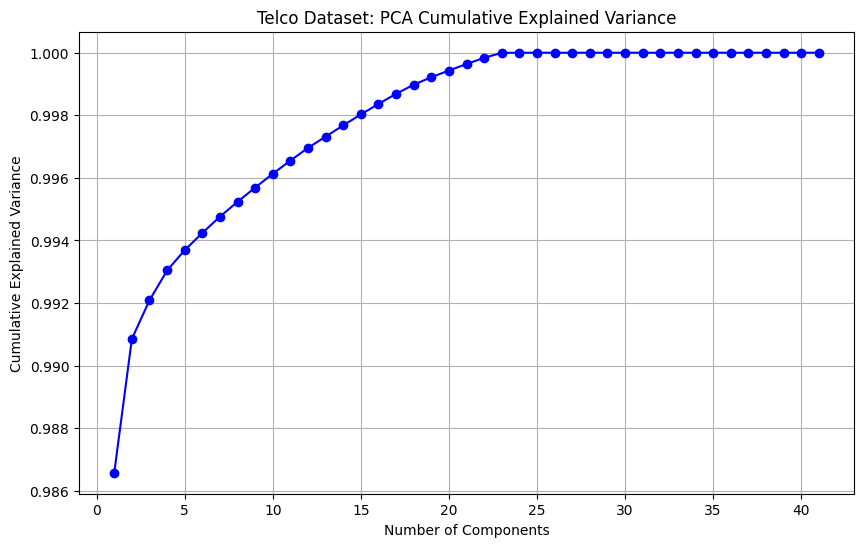

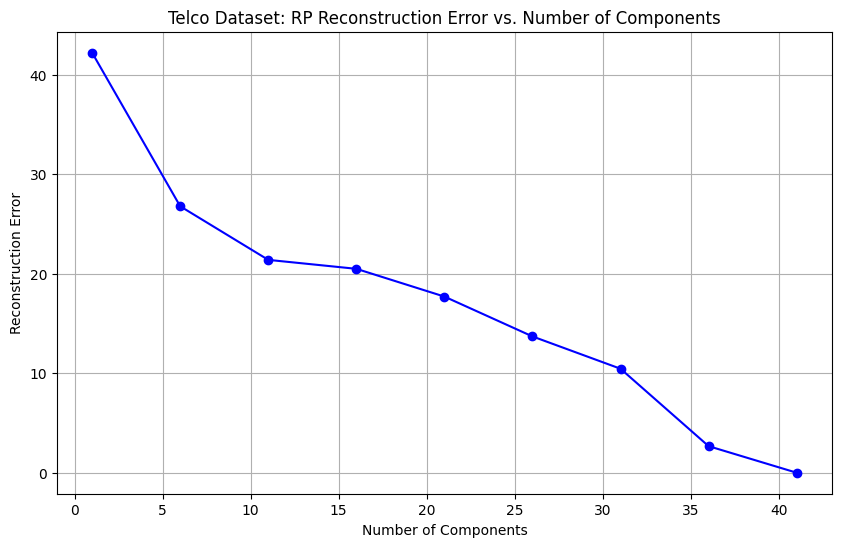

/Users/nasharma/Code/.venv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


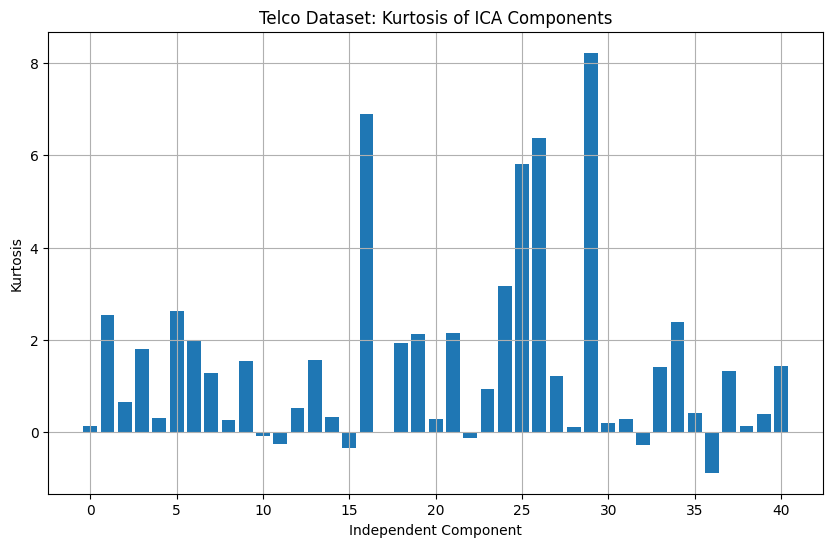

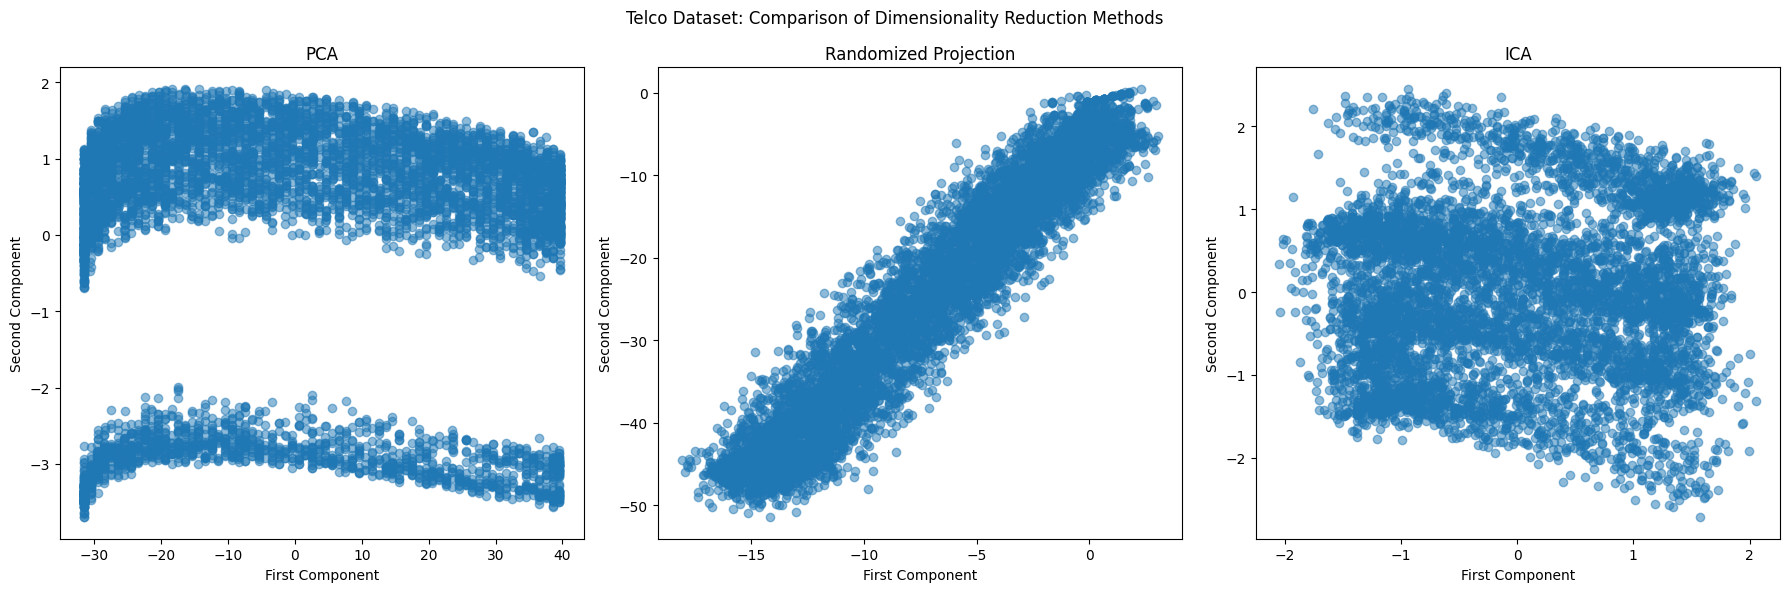

In [122]:
for dataset_name, dataset in datasets:
    print(f"\n--- {dataset_name} Dataset ---\n")

    # PCA
    pca = PCA()
    pca.fit(dataset)
    plot_cumulative_variance(pca, f'{dataset_name} Dataset: PCA Cumulative Explained Variance')

    # Randomized Projection
    n_components = min(dataset.shape[1], 100)  # Adjust as needed

    # Plot RP reconstruction error for different numbers of components
    rp_errors = []
    component_range = range(1, n_components + 1, 5)
    for n in component_range:
        rp_errors.append(reconstruction_error(dataset, n))

    plt.figure(figsize=(10, 6))
    plt.plot(component_range, rp_errors, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.title(f'{dataset_name} Dataset: RP Reconstruction Error vs. Number of Components')
    plt.grid(True)
    plt.show()

    # Independent Component Analysis
    ica = FastICA(n_components=n_components, random_state=42)
    X_ica = ica.fit_transform(dataset)

    # Plot kurtosis of ICA components
    plot_kurtosis(ica, f'{dataset_name} Dataset: Kurtosis of ICA Components')

    # Visualize the first two components of each method
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'{dataset_name} Dataset: Comparison of Dimensionality Reduction Methods')

    # PCA
    X_pca = pca.transform(dataset)
    axs[0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    axs[0].set_title('PCA')
    axs[0].set_xlabel('First Component')
    axs[0].set_ylabel('Second Component')

    # RP
    rp = GaussianRandomProjection(n_components=2, random_state=42)
    X_rp = rp.fit_transform(dataset)
    axs[1].scatter(X_rp[:, 0], X_rp[:, 1], alpha=0.5)
    axs[1].set_title('Randomized Projection')
    axs[1].set_xlabel('First Component')
    axs[1].set_ylabel('Second Component')

    # ICA
    axs[2].scatter(X_ica[:, 0], X_ica[:, 1], alpha=0.5)
    axs[2].set_title('ICA')
    axs[2].set_xlabel('First Component')
    axs[2].set_ylabel('Second Component')

    plt.tight_layout()
    plt.show()

    print("\n")

## 3. Clustering over Dim Reduced Datasets (2x3x2) : 12 Combinations

In [29]:
datasets = [
    ("Wine", X_scaled),
    ("Telco", telco_df)
]

dim_red_methods = [
    ("PCA", PCA(n_components=0.85)),
    ("ICA", FastICA(n_components=10, random_state=42)),
    ("RP", GaussianRandomProjection(n_components=10, random_state=42))
]

clustering_methods = [
    ("K-Means", KMeans(n_clusters=3, random_state=42)),
    ("GMM", GaussianMixture(n_components=3, random_state=42))
]

results = []

In [30]:

for dataset_name, dataset in datasets:
    print(f"\n--- {dataset_name} Dataset ---\n")
    
    # Original clustering
    for cluster_name, cluster_model in clustering_methods:
        labels = cluster_model.fit_predict(dataset)
        silhouette = silhouette_score(dataset, labels)
        results.append({
            'Dataset': dataset_name,
            'Dim Red': 'None',
            'Clustering': cluster_name,
            'Silhouette': silhouette
        })
        print(f"Original {cluster_name} Silhouette Score: {silhouette:.4f}")
    
    # Dimensionality reduction + clustering
    for dim_red_name, dim_red_model in dim_red_methods:
        reduced_data = dim_red_model.fit_transform(dataset)
        
        print(f"\n{dim_red_name} Reduced Data Shape: {reduced_data.shape}")
        
        for cluster_name, cluster_model in clustering_methods:
            labels = cluster_model.fit_predict(reduced_data)
            silhouette = silhouette_score(reduced_data, labels)
            results.append({
                'Dataset': dataset_name,
                'Dim Red': dim_red_name,
                'Clustering': cluster_name,
                'Silhouette': silhouette
            })
            print(f"{dim_red_name} + {cluster_name} Silhouette Score: {silhouette:.4f}")


results_df = pd.DataFrame(results)




--- Wine Dataset ---

Original K-Means Silhouette Score: 0.1892
Original GMM Silhouette Score: 0.1202

PCA Reduced Data Shape: (1599, 6)
PCA + K-Means Silhouette Score: 0.2172
PCA + GMM Silhouette Score: 0.2242

ICA Reduced Data Shape: (1599, 10)
ICA + K-Means Silhouette Score: 0.1149
ICA + GMM Silhouette Score: 0.1455

RP Reduced Data Shape: (1599, 10)
RP + K-Means Silhouette Score: 0.2743
RP + GMM Silhouette Score: 0.1054

--- Telco Dataset ---

Original K-Means Silhouette Score: 0.5914
Original GMM Silhouette Score: 0.1850

PCA Reduced Data Shape: (7032, 1)
PCA + K-Means Silhouette Score: 0.6378
PCA + GMM Silhouette Score: 0.5173

ICA Reduced Data Shape: (7032, 10)
ICA + K-Means Silhouette Score: 0.1298
ICA + GMM Silhouette Score: 0.1141

RP Reduced Data Shape: (7032, 10)
RP + K-Means Silhouette Score: 0.6066
RP + GMM Silhouette Score: 0.0394


In [35]:
results_df

Dataset Dim Red Clustering  Silhouette
0     Wine    None    K-Means    0.189204
1     Wine    None        GMM    0.120230
2     Wine     PCA    K-Means    0.217184
3     Wine     PCA        GMM    0.224210
4     Wine     ICA    K-Means    0.114892
5     Wine     ICA        GMM    0.145451
6     Wine      RP    K-Means    0.274283
7     Wine      RP        GMM    0.105424
8    Telco    None    K-Means    0.591415
9    Telco    None        GMM    0.185036
10   Telco     PCA    K-Means    0.637843
11   Telco     PCA        GMM    0.517309
12   Telco     ICA    K-Means    0.129804
13   Telco     ICA        GMM    0.114064
14   Telco      RP    K-Means    0.606618
15   Telco      RP        GMM    0.039450

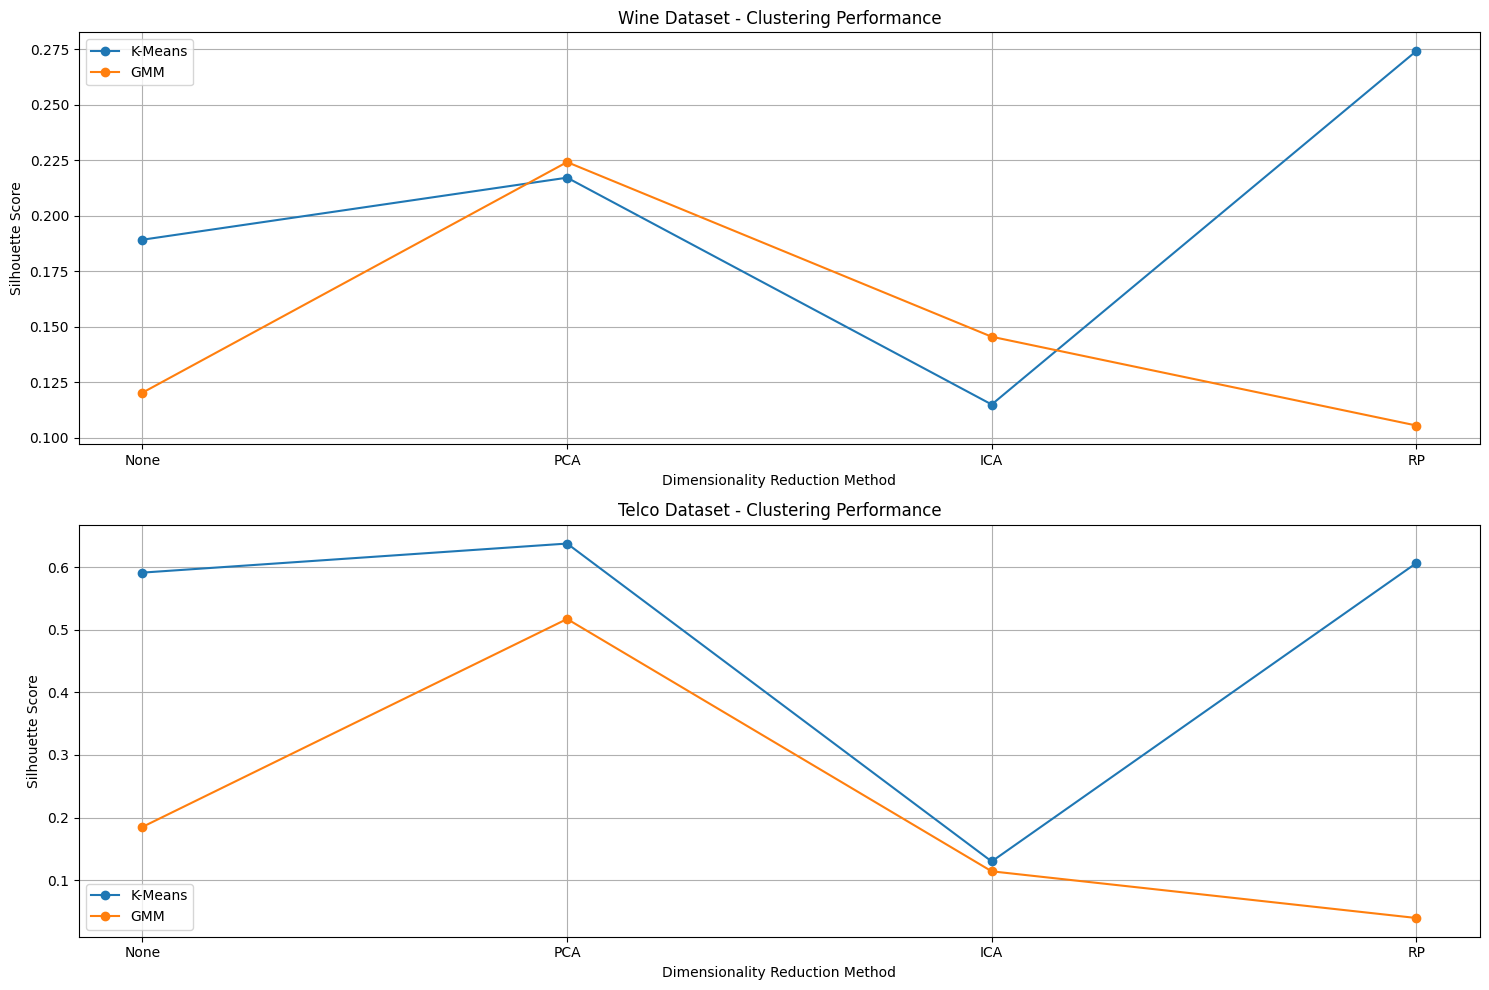

In [31]:
# Plot results
plt.figure(figsize=(15, 10))
for dataset in datasets:
    dataset_results = results_df[results_df['Dataset'] == dataset[0]]
    
    plt.subplot(2, 1, datasets.index(dataset) + 1)
    for cluster in clustering_methods:
        cluster_results = dataset_results[dataset_results['Clustering'] == cluster[0]]
        plt.plot(cluster_results['Dim Red'], cluster_results['Silhouette'], 
                 marker='o', label=f"{cluster[0]}")
    
    plt.title(f"{dataset[0]} Dataset - Clustering Performance")
    plt.xlabel("Dimensionality Reduction Method")
    plt.ylabel("Silhouette Score")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



In [34]:
# Print the best combination for each dataset
for dataset in datasets:
    dataset_results = results_df[results_df['Dataset'] == dataset[0]]
    best_result = dataset_results.loc[dataset_results['Silhouette'].idxmax()]
    print(f"\nBest combination for {dataset[0]} dataset:")
    print(f"Dim Red: {best_result['Dim Red']}, Clustering: {best_result['Clustering']}")
    print(f"Silhouette Score: {best_result['Silhouette']:.4f}")


Best combination for Wine dataset:
Dim Red: RP, Clustering: K-Means
Silhouette Score: 0.2743

Best combination for Telco dataset:
Dim Red: PCA, Clustering: K-Means
Silhouette Score: 0.6378


## 4. NN for Wine Dataset over 3 Red Dim Datasets

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


In [37]:
wine_df = pd.read_csv("../A1/data/wine_quality/winequality-red.csv", delimiter=';')
wine_df['quality'] = (wine_df['quality'] >= 6).astype(int)

X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [39]:
def create_model():
    return MLPClassifier(solver='adam', 
                         alpha=0.0001, 
                         hidden_layer_sizes=(64, 32, 16), 
                         learning_rate_init=0.0001,
                         random_state=1, 
                         max_iter=5000)

# Function to train and evaluate model
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = create_model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    return accuracy

In [40]:
# Original data
original_accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, "Original Data")

# Dimensionality reduction methods
dim_red_methods = [
    ("PCA", PCA(n_components=0.95)),
    ("ICA", FastICA(n_components=10, random_state=42)),
    ("RP", GaussianRandomProjection(n_components=10, random_state=42))
]

results = [("Original", original_accuracy)]




Original Data Accuracy: 0.7438
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       213
           1       0.77      0.78      0.77       267

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



In [41]:
for name, method in dim_red_methods:
    print(f"\n--- {name} ---")
    X_reduced = method.fit_transform(X_scaled)
    X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)
    accuracy = train_and_evaluate(X_train_reduced, X_test_reduced, y_train, y_test, name)
    results.append((name, accuracy))
    
    if name == "PCA":
        explained_variance = method.explained_variance_ratio_
        print(f"Number of components: {method.n_components_}")
        print(f"Explained variance ratio: {explained_variance}")




--- PCA ---

PCA Accuracy: 0.7729
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       213
           1       0.78      0.82      0.80       267

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

Number of components: 9
Explained variance ratio: [0.282 0.175 0.141 0.110 0.087 0.060 0.053 0.038 0.031]

--- ICA ---

ICA Accuracy: 0.7667
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       213
           1       0.79      0.78      0.79       267

    accuracy                           0.77       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.77      0.77      0.77       480


--- RP ---

RP Accuracy: 0.7542
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       213
           1       0.76     

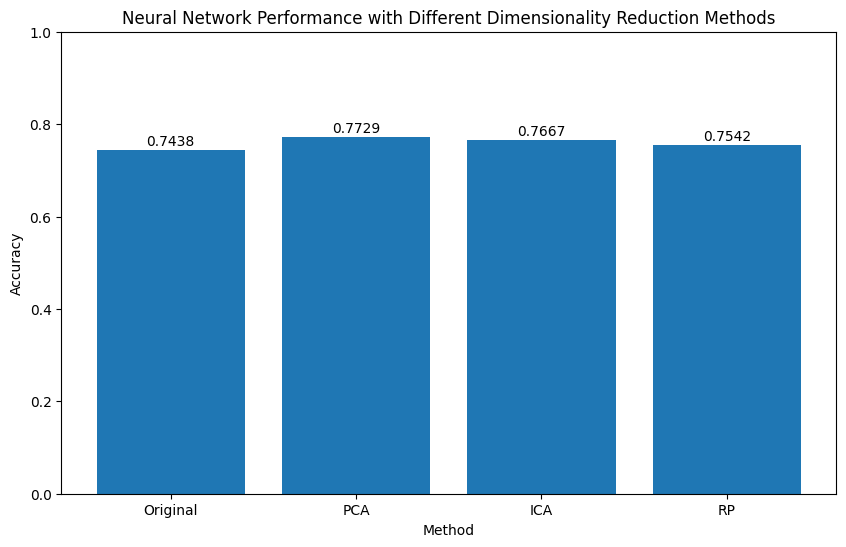

In [42]:
# Plot results
methods, accuracies = zip(*results)
plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies)
plt.title("Neural Network Performance with Different Dimensionality Reduction Methods")
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()



In [43]:
# Find the best performing method
best_method = max(results, key=lambda x: x[1])
print(f"\nBest performing method: {best_method[0]} with accuracy {best_method[1]:.4f}")


Best performing method: PCA with accuracy 0.7729


## 5. NN for Wine Dataset with Clustering Labels from Part 1

In [44]:

n_clusters = 3  

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

# Add cluster labels as new features
X_kmeans = np.column_stack((X_scaled, kmeans_clusters))
X_gmm = np.column_stack((X_scaled, gmm_clusters))



In [46]:
# Train and evaluate with K-Means clusters
X_train_kmeans, X_test_kmeans, y_train, y_test = train_test_split(X_kmeans, y, test_size=0.3, random_state=42)
kmeans_accuracy = train_and_evaluate(X_train_kmeans, X_test_kmeans, y_train, y_test, "K-Means Clusters")

# Train and evaluate with GMM clusters
X_train_gmm, X_test_gmm, y_train, y_test = train_test_split(X_gmm, y, test_size=0.3, random_state=42)
gmm_accuracy = train_and_evaluate(X_train_gmm, X_test_gmm, y_train, y_test, "GMM Clusters")



K-Means Clusters Accuracy: 0.7792
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       213
           1       0.80      0.80      0.80       267

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480


GMM Clusters Accuracy: 0.7875
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       213
           1       0.80      0.82      0.81       267

    accuracy                           0.79       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.79      0.79       480



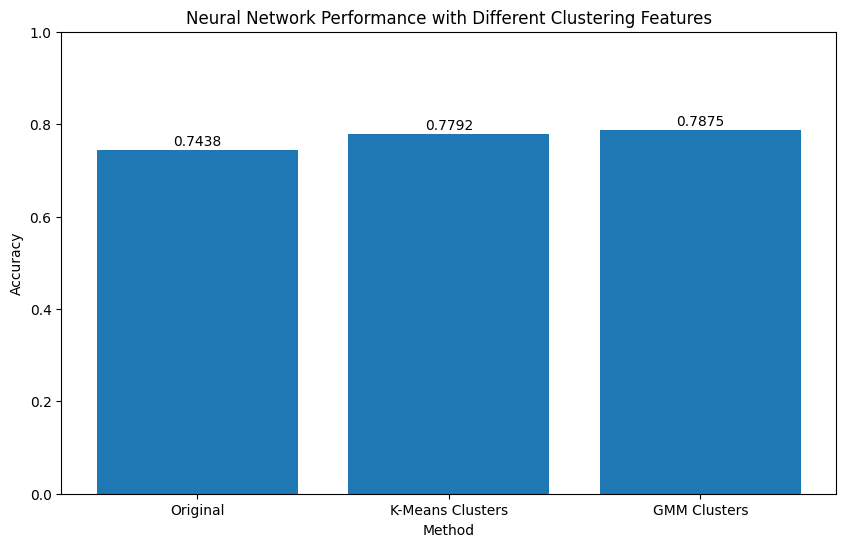

In [47]:

# Plot results
methods = ['Original', 'K-Means Clusters', 'GMM Clusters']
accuracies = [original_accuracy, kmeans_accuracy, gmm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies)
plt.title("Neural Network Performance with Different Clustering Features")
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()



In [48]:
# Find the best performing method
best_method = max(zip(methods, accuracies), key=lambda x: x[1])
print(f"\nBest performing method: {best_method[0]} with accuracy {best_method[1]:.4f}")


Best performing method: GMM Clusters with accuracy 0.7875


### 